<a href="https://colab.research.google.com/github/bharathvariar/Derangements/blob/main/Neutron_Star_TOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using TOV equations and a Polytropic Equation of State to plot Mass-Radius curve for a typical neutron star.
#### Bharath Variar, 2019B5A70930H
#### Adit Danewa, 2019B5A71372H


## Initialization
Importing relavant libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.autolayout"] = True
plt.inline = True
PI = np.pi
km = 6.7426e-1 # 1 km -> M.
kg = 5.02785e-31 # 1 kg -> M.
mevfm = 2.9092e-6 # 1 MeV/fm^3 -> M.^-2
mev = 8.896e-61 # 1 MeV -> M. 

##Equation of State
Using a polytropic Equation of State (EOS) to find pressure ($p(r))$) from energy density ($ϵ(r)$) using two parameteres $(Κ, γ)$ \\

$$ p(r) = Κϵ(r)^γ $$

Using $Κ = 0.00119224$ and $γ = 1.82059886$

$ 1 \ MeV/fm^3  = 2.9092 × 10^{-6} M_\odot ^ {-2} $ \
$ 1 \ km = 6.7426 × 10^{-1} M_\odot $

In [ ]:
def EOS(p, K_inv = 838.75729718, gamma_inv = 0.54926981):
    '''
    Arguments: p (in mev/fm^3)
    Returns: epsilon (in MeV/fm^3)
    '''
    epsilon = np.power(p * K_inv, gamma_inv)
    return epsilon

def EOS2(epsilon,K = 0.00119224, gamma = 1.82059886):
    '''
    Arguments: epsilon (in MeV/fm^3)
    Returns: p (in MeV/fm^3)
    '''
    p = K * np.power(epsilon, gamma)
    return p

## The TOV Differential Equations
Now that we have the pressure, we will use it to solve the Tolman-Oppenheimer-Volkoff (TOV) equations to find equilibrium conditions of non-rotating stars in General Relativity.
The TOV equtations are:
$$ \frac{dM(r)}{dr} = \frac{4\pi r^2 \epsilon (r)}{c^2} $$
$$ \frac{dp(r)}{dr} = -\frac{G\epsilon (r)M(r)}{c^2 r^2}\left(1 + \frac{p(r)}{\epsilon (r)}\right)\left(\frac{1 + 4\pi r^3 p(r)}{M(r)c^2}\right){\left(1 - \frac{2GM(r)}{c^2 r}\right)}^{-1}  $$

Using $G = c = M_{\odot} = 1$ the pressure equation can be simplified to:

$$ \frac{dM(r)}{dr} = {4\pi r^2 \epsilon (r)} $$

$$ \frac{dp(r)}{dr} = -\frac{(\epsilon (r) + p(r))(M(r) + 4\pi r^3p(r))}{r(r - 2M(r))}$$

We use initial energy density $$ϵ = 463.27 \ MeV/fm^3$$ and boundary condition for pressure $$p(r = R) = 0$$

In [ ]:
def TOV(r, y_array):
    '''
    input: r, y_array (p0, m0)
    output: values after applying differential equation on y_array
    '''
    p0, m0 = y_array
    p0 = p0*(1/mevfm) # P in M.^-2 to MeV/fm^3 for EOS
    epsilon = EOS(p0)
    epsilon *= mevfm # Converting epsilon from MeV/fm^3 to M.^-2
    p0 *= mevfm # Reconverting p0 from from MeV/fm^3 to M.^-2
    dy0 = -(epsilon+p0)*(m0 + 4*PI*p0*(r**3))/(r*(r-2*m0))
    dy1 = 4*PI*(r**2)*epsilon
    return np.array([dy0,dy1])

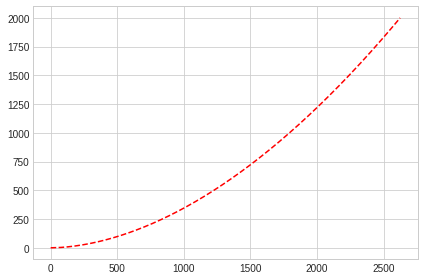

In [ ]:
p_min = 1.0e-8 # Min. Pressure in MeV/fm^3
p_max = 2000 # Max Pressure in MeV/fm^3
num_points = 1200 # number of points to divide array into
pres_array = np.linspace(p_min, p_max, 1200) # Pressure array in MeV
epsilon_array = np.array([EOS(pres) for pres in pres_array])
plt.plot(epsilon_array, pres_array, 'r--')

## Fourth Order Runge-Kutta Method
To solve equations of the form
$$\frac{dy}{dx} = f(x, y) \nonumber $$
with initial condition $y(0) = y_{0}$, we use the fourth order Runge-Kutta method by defining the following variables: 
\begin{align}
    k_{1} &= hf(x_i, y_i) \nonumber \\
    k_{2} &= hf(x_i + \frac{h}{2}, y_i + \frac{k_1}{2}) \nonumber \\
    k_{3} &= hf(x_i + \frac{h}{2}, y_i + \frac{k_2}{2}) \nonumber \\
    k_{4} &= hf(x_i + h, y_i + k_3) \nonumber
\end{align}
For a given range of $x$ and step size, $h$, $[x0, x]$, we divide the interval into $\{x_0, x_1, \dots, x_i, \dots, x\}$ where $x_{i+1} = x_{i} + h$.
The solution is then given by: 
\begin{equation}
    y_{i+1} = y_{i} + \frac{k_1}{6} + \frac{k_2}{3} + \frac{k_3}{3} + \frac{k_4}{6} + O(h^5)
\end{equation}

In [ ]:
def rungeKutta4(funct, y0, x_min, x_max, n):

    # Count number of iterations using step size or use fixed number of points.
    # step height h
    # y0 are the initial conditions.
    rad_arr = np.linspace(x_min, x_max, n+1)
    y = np.array((n+1)*[y0])
    h = rad_arr[1] - rad_arr[0]
    # Iterate for number of iterations
    for i in range(n):
        # "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * funct(rad_arr[i], y[i])
        k2 = h * funct(rad_arr[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * funct(rad_arr[i] + 0.5 * h, y[i] + 0.5 * k2)
        k4 = h * funct(rad_arr[i] + h, y[i] + k3) 
        
        # Update next value of y
        y[i+1] = y[i] + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # check stop condition
        if(y[i][0] <= 1.0e-13):
            return rad_arr[:i], y[:i],
            break
        
    return rad_arr, y

In [ ]:
p_min = 1.0e-8 
p_max = 2000
r_min = 0.01 # minimum radius in M.
r_max = 30 * km # max radius in M.
mass_arr = np.zeros(num_points)
rad_arr = np.zeros(num_points) 
epsilon_init = 463.27 # MeV/fm^3
m0 = (4/3)*PI*(r_min**3) * epsilon_init * mevfm # Mass in M.
p0 = EOS2(epsilon_init) * mevfm # initial pressure in M.^-2
y0 = (p0,m0) # (MeV, MeV/fm^3)
rad_arr, y = rungeKutta4(TOV, y0, r_min, r_max, num_points)
p_arr, m_arr = y.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


## Visualisation

### For a single star

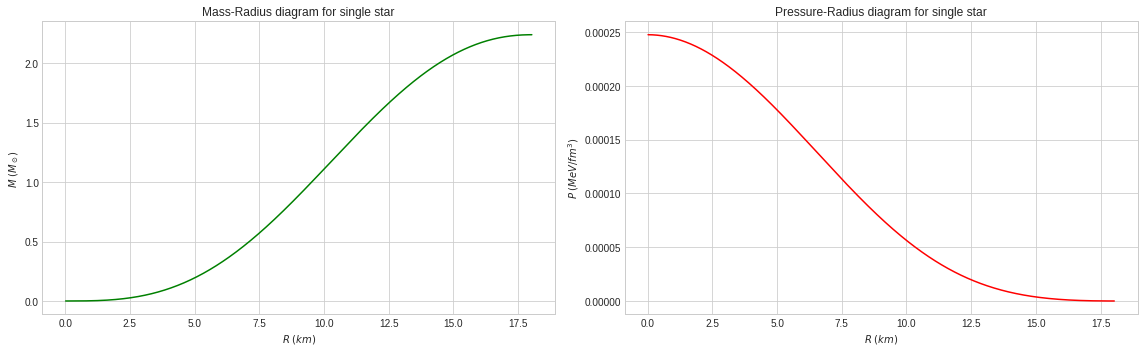

In [ ]:
r_arr = [np.linspace(r_min, r_max, num_points+1)][:len(m_arr)][0]
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title('Mass-Radius diagram for single star')
plt.plot([r/km for r in r_arr], list(m_arr), 'g-', label = "mass")
plt.xlabel('$R$ $(km)$')
plt.ylabel('$M$ $(M_\odot)$')
plt.savefig('mass_single_star.png')
plt.subplot(1, 2, 2)
plt.title('Pressure-Radius diagram for single star')
plt.plot([r/km for r in r_arr], list(p_arr), 'r-', label = "pressure")
plt.xlabel('$R$ $(km)$')
plt.ylabel('$P$ $(MeV/fm^3)$')
plt.savefig('pressure_single_star.png')
plt.show()

### For multiple stars

In [ ]:
e_min = 1.0 #0.017 #MeV/fm^3
e_max = 1500.0 #Mev/fm^3
tot_stars = 100
e_span = np.linspace(e_min, e_max, tot_stars)

rmin = 1e-2 #solar mass
rmax = 30*km #solar mass
div = 20000

R_plot = []
M_plot = []

for star_index, ec in enumerate(e_span):
    
    S_0 = (EOS2(ec)*mevfm, (4/3)*np.pi*((rmin)**3)*ec*mevfm)
    t,u  = rungeKutta4(TOV, S_0 , rmin , rmax , div)
    p_sol,m_sol  = u.T
    
    if len(m_sol) > 0:
        r_span = list(np.linspace(rmin, rmax, div+1))[:len(m_sol)]
        R_plot.append(r_span.pop()/km)
        M_plot.append(list(m_sol).pop())  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


In [ ]:
max_mass = max(M_plot)
index = np.where(M_plot == max_mass)[0][0]
R_plot.append(R_plot[index])
M_plot.append(M_plot[index])
dict = list(zip(M_plot, R_plot))
dict = [tup for tup in dict if not np.isnan(tup[0])]
radius_at_max_mass = [tup[1] for tup in dict if tup[0] == max_mass][0]

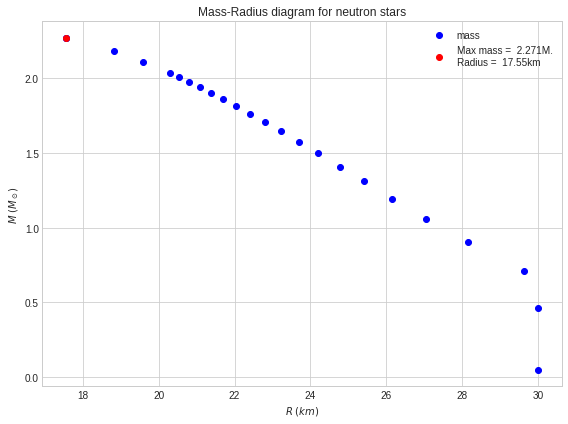

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Mass-Radius diagram for neutron stars')
plt.xlabel('$R$ $(km)$')
plt.ylabel('$M$ $(M_\odot)$')
plt.savefig('mass_multiple_stars.png')
plt.plot(R_plot, M_plot, 'bo', label = "mass", )
plt.plot(R_plot[index], M_plot[index], 'ro', label = f'Max mass = {max_mass: .3f}M.\nRadius = {radius_at_max_mass: .2f}km')
plt.legend(loc='upper right')
plt.savefig('mass_multiple_stars.png')